In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df = pd.read_excel('regression_data.xls')
#print(df.head(5))  # print first 5 rows of the dataframe

In [2]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [3]:
#drop intial columns that are not going to be useful
df = df.drop(columns = ['id', 'date'])

In [4]:
#Check for NA's
for elem in df.columns:
    print(df[elem].isna().sum(),elem)

0 bedrooms
0 bathrooms
0 sqft_living
0 sqft_lot
0 floors
0 waterfront
0 view
0 condition
0 grade
0 sqft_above
0 sqft_basement
0 yr_built
0 yr_renovated
0 zipcode
0 lat
0 long
0 sqft_living15
0 sqft_lot15
0 price


In [5]:
columns = df.columns.tolist()

In [6]:
#Borramos un outlier detectado con 33 bedrooms
for i in range(len(df['bedrooms'])):
    if df['bedrooms'][i] == 33:
        print(i)

15856


In [7]:
df.drop(labels = 15856 ,axis = 0, inplace = True)

C:\Users\FE161VK\AppData\Local\Temp\ipykernel_29652\3725329870.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


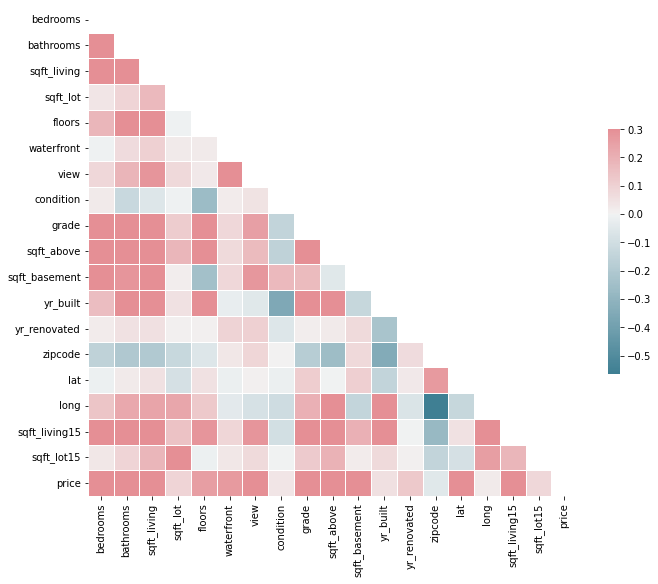

In [8]:
#Matriz de correlaciones



corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)



sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5});



# Salvo para las variables de portero, no se aprecian correlaciones significativas

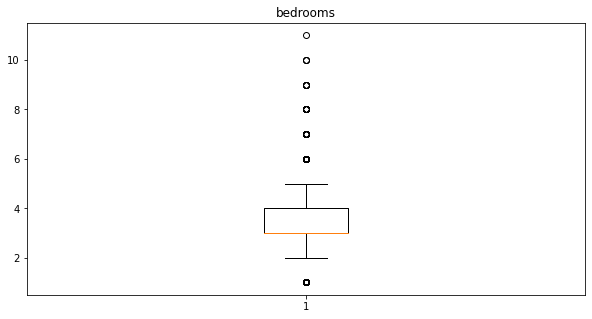

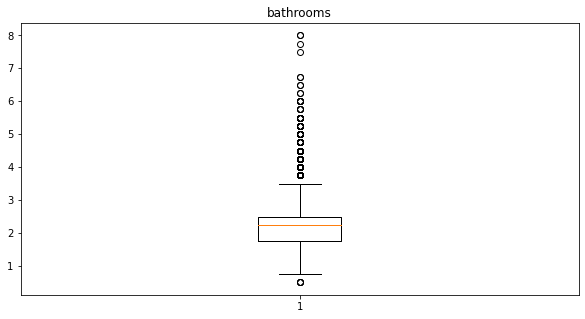

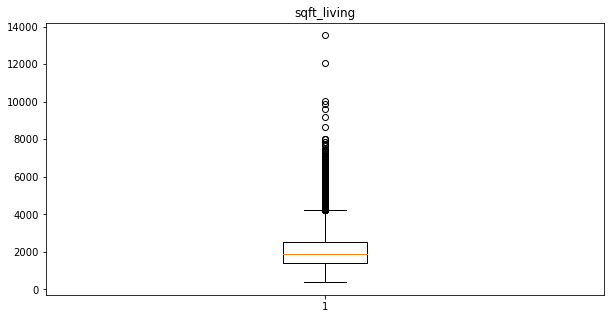

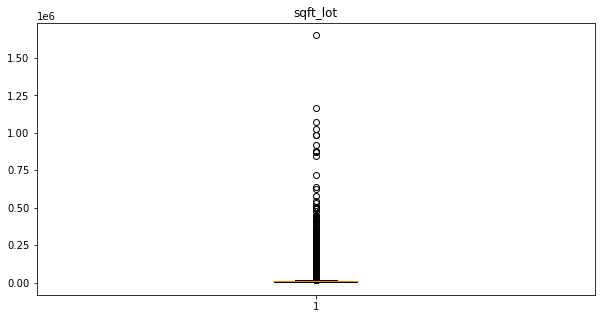

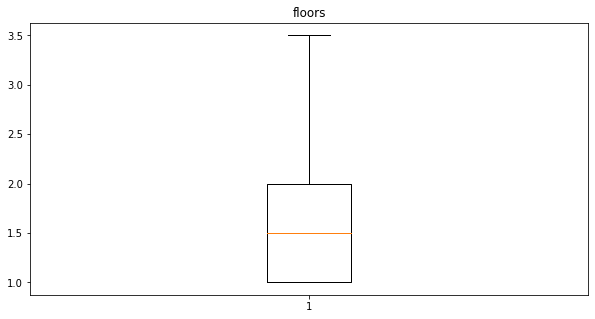

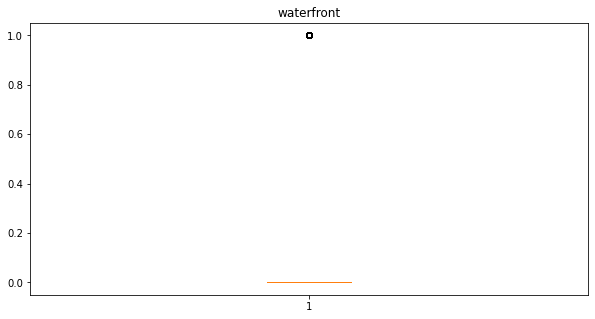

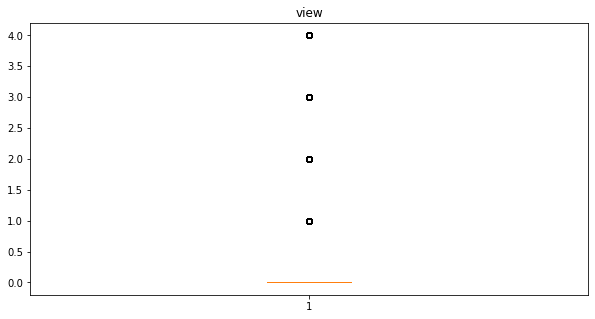

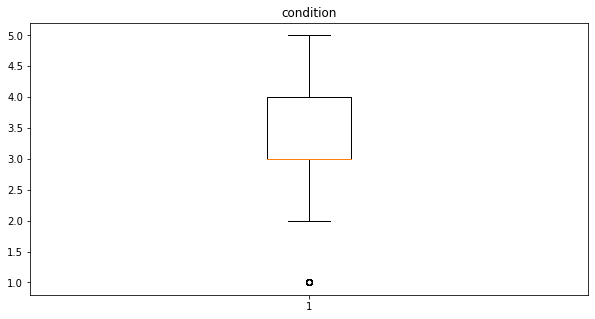

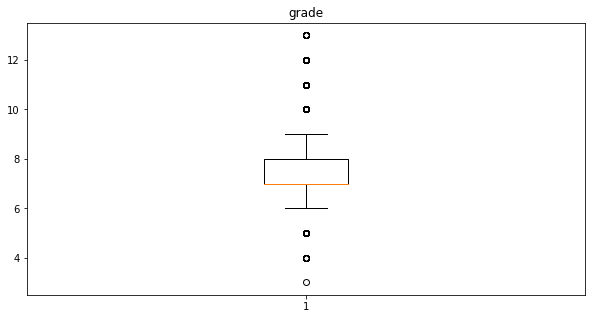

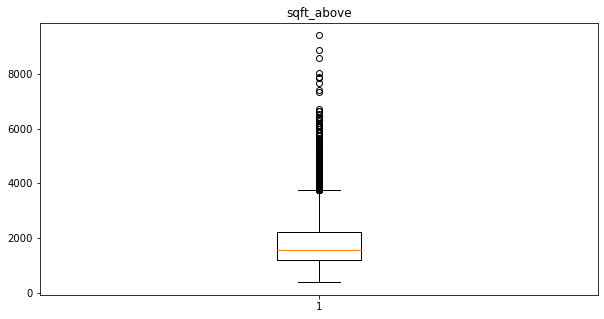

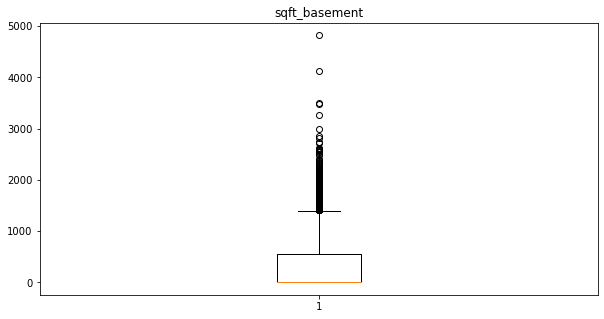

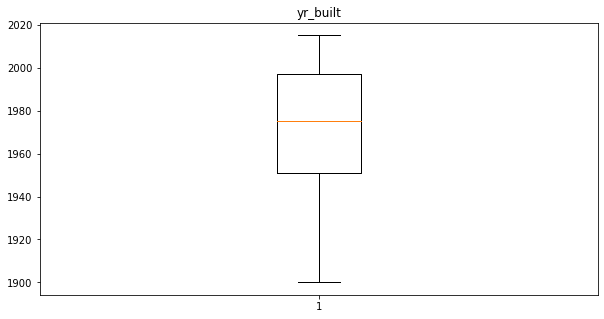

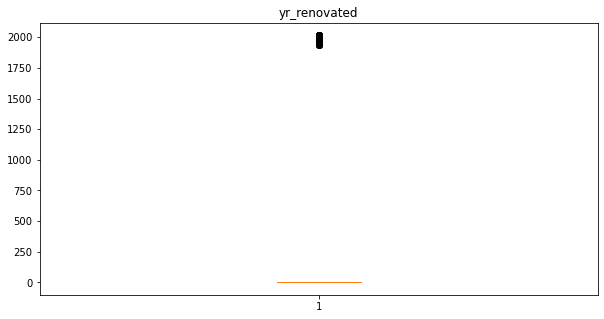

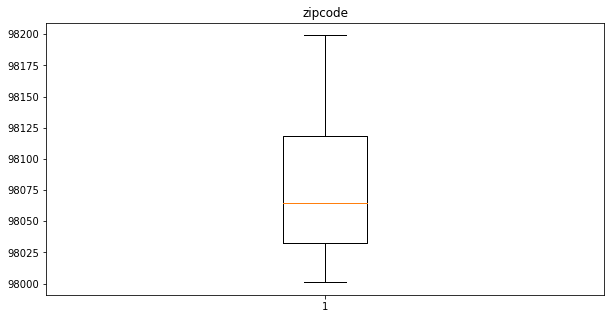

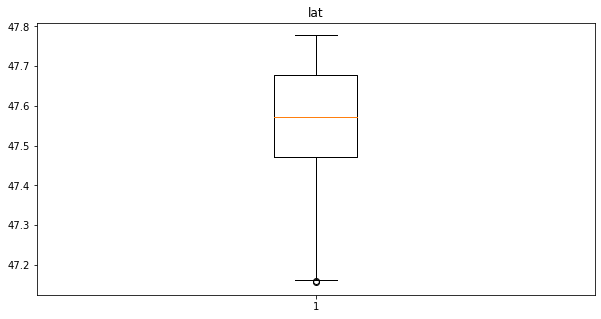

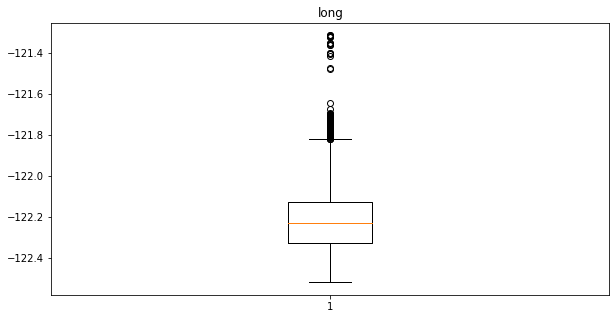

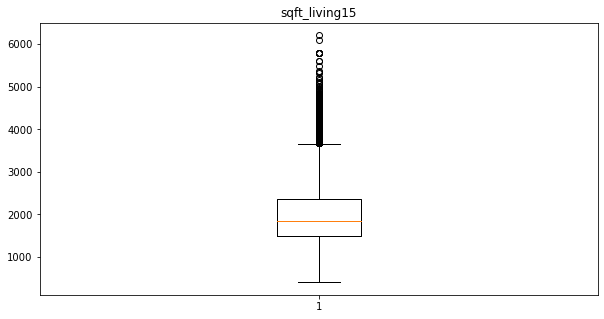

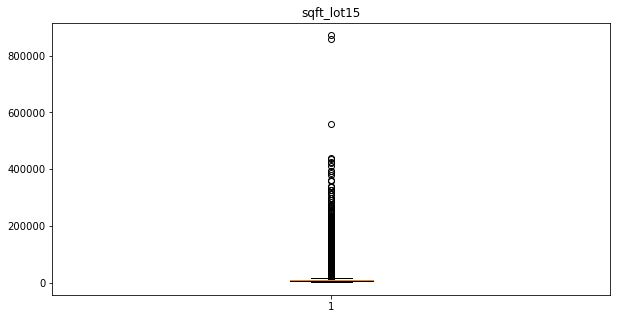

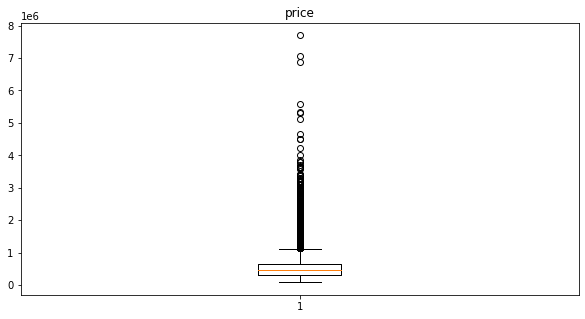

In [9]:
for c in columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[c])
    plt.title(c)
    plt.show();

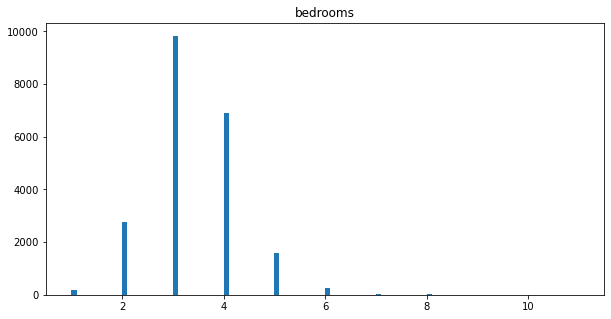

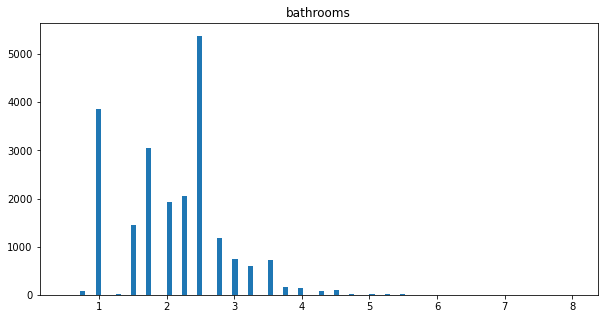

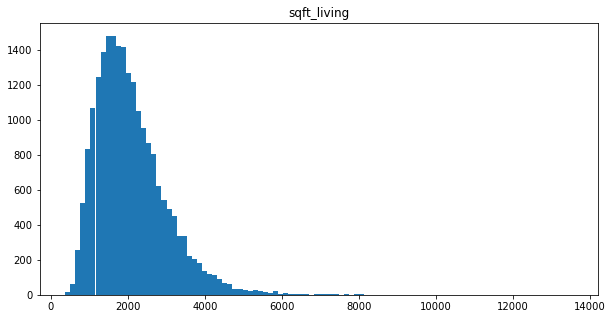

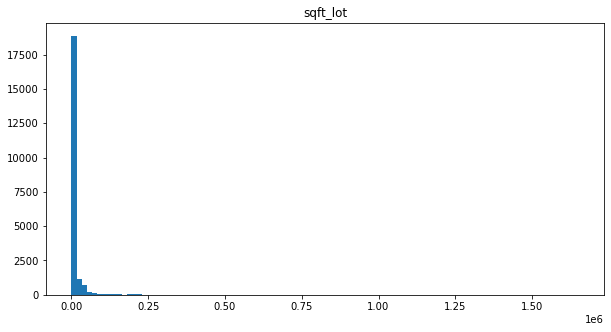

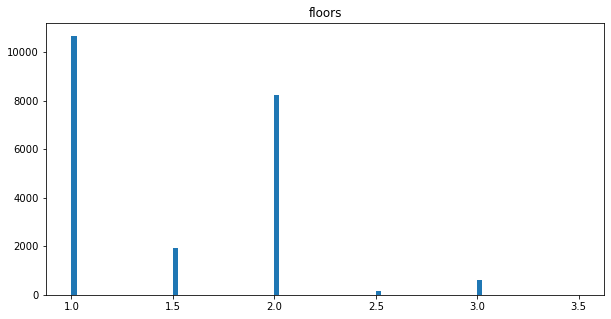

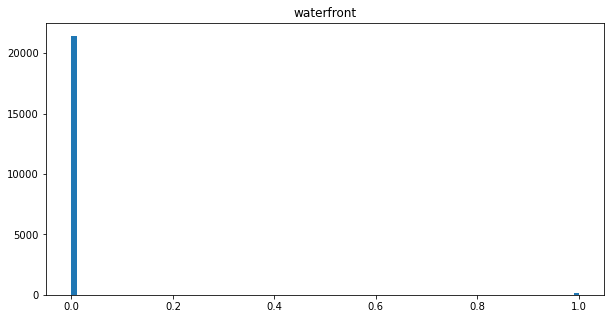

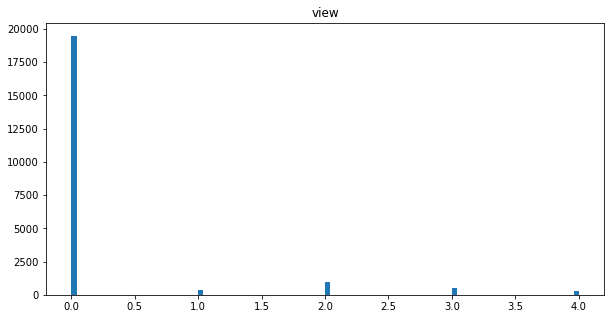

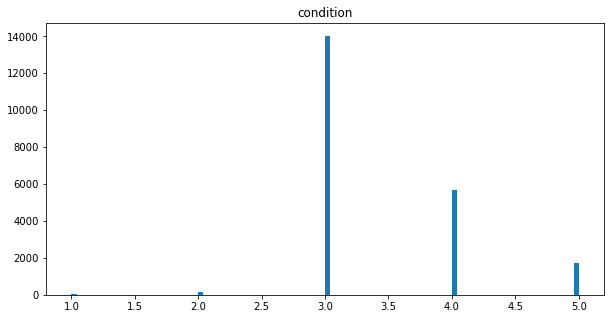

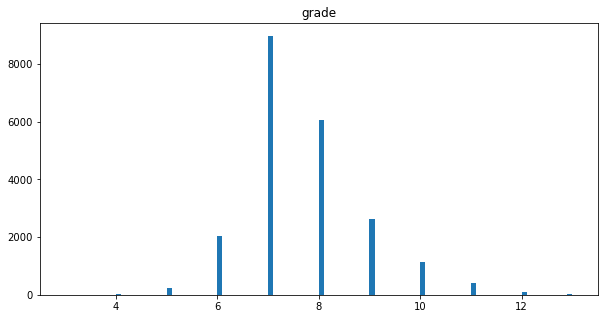

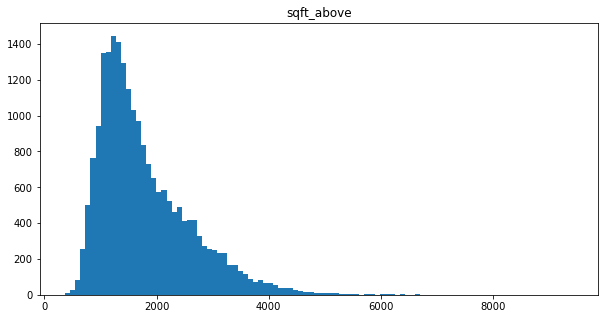

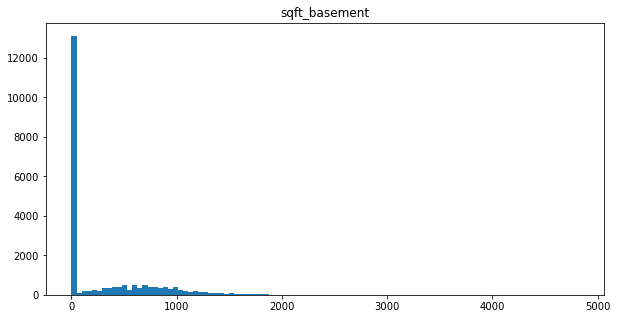

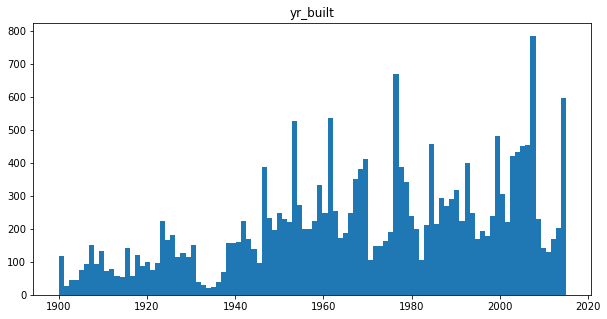

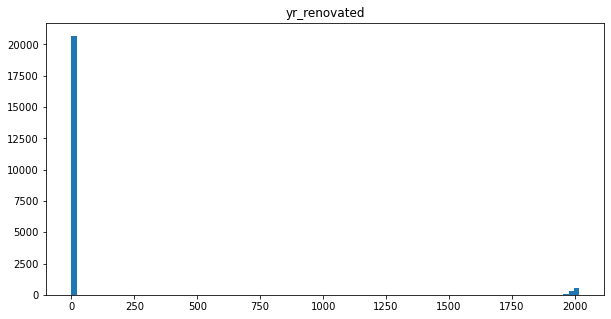

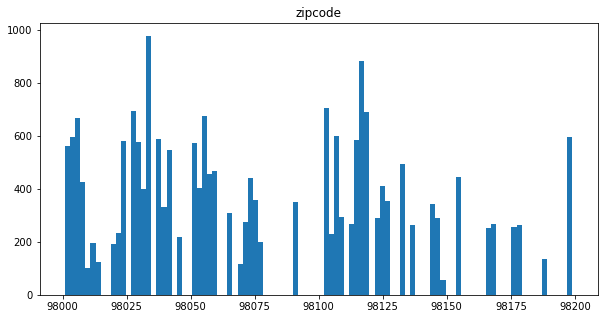

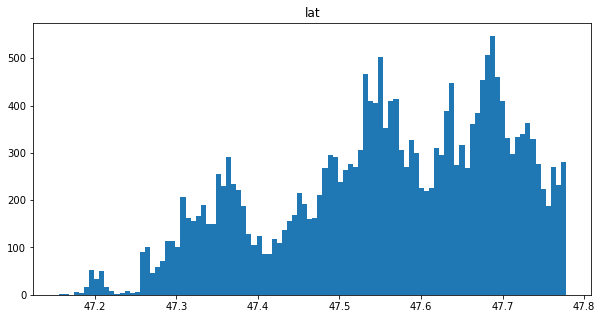

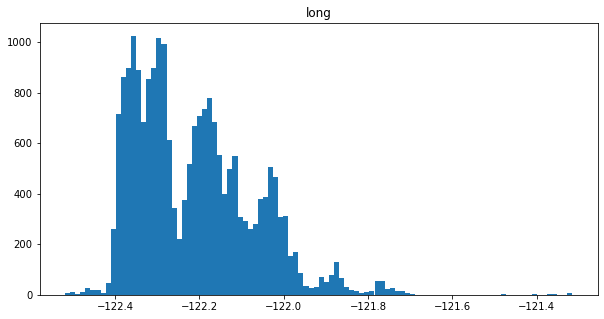

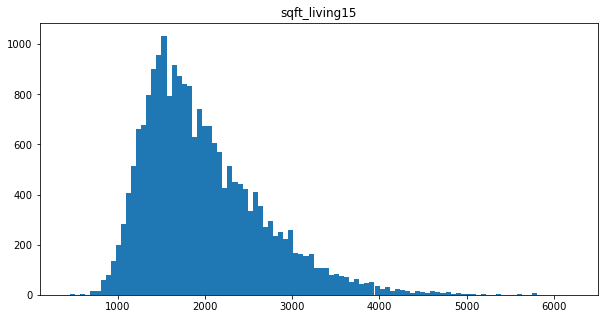

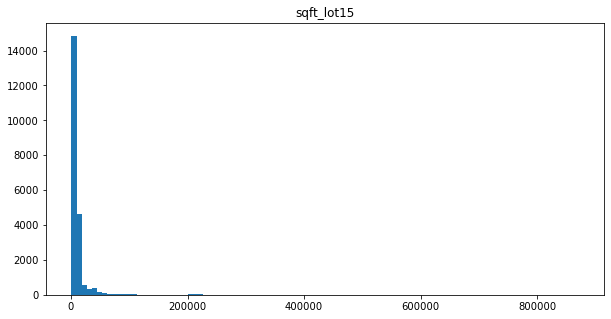

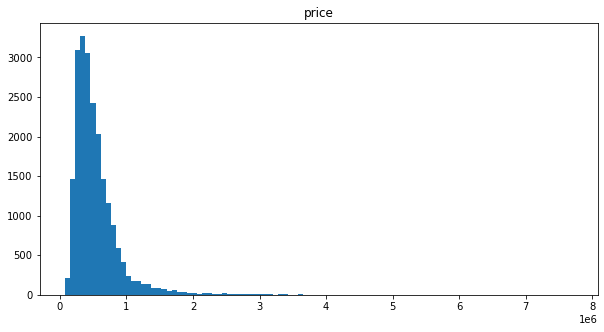

In [10]:
for i in columns:   
    plt.figure(figsize=(10,5))
    plt.hist(df[i], bins = 100)
    plt.title(i)
    plt.show();

In [11]:
log_cols = ['sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']

In [12]:
def log_transfom_clean1(x):
    x = np.log(x)
    if np.isfinite(x): #para protegernos del hecho de que log(0) = infinito
        return x
    else:
        return 0



for i in log_cols:
    df[i+'_log'] = list(map(log_transfom_clean1, df[i]))

C:\Users\FE161VK\AppData\Local\Temp\ipykernel_29652\517998444.py:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(x)


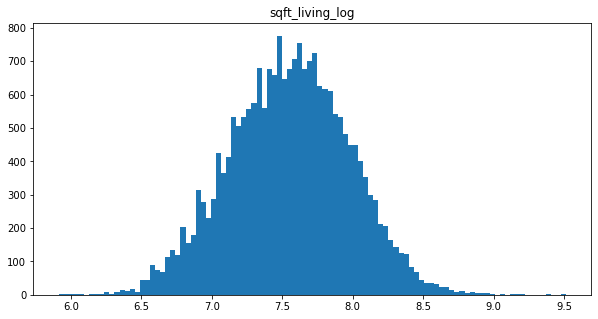

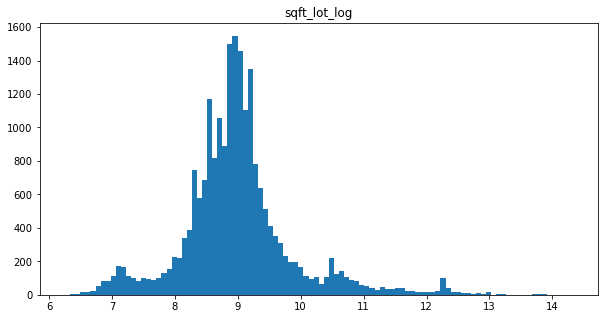

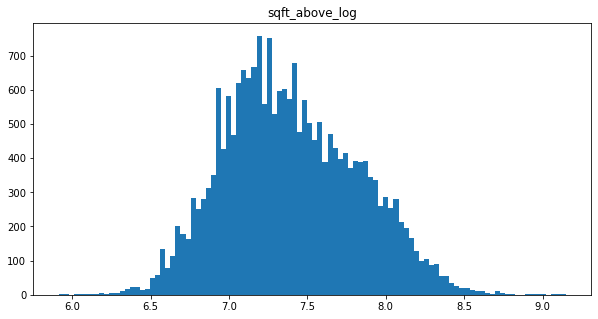

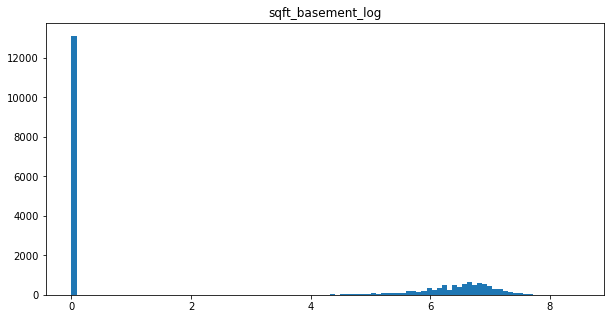

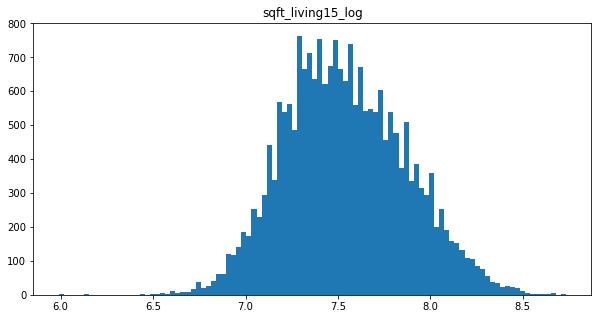

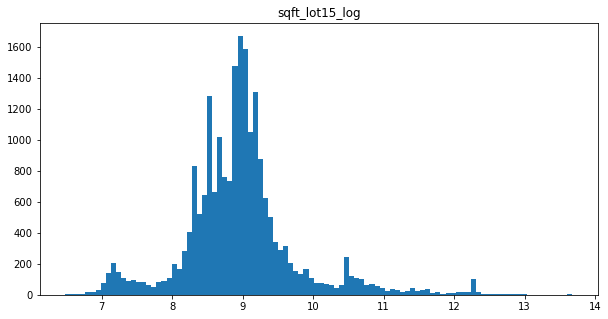

In [13]:
for i in log_cols:   
    plt.figure(figsize=(10,5))
    plt.hist(df[i+'_log'],bins = 100)
    plt.title(i+'_log')
    plt.show();

In [14]:
for i in log_cols:
    df.drop(i, axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
#Normalizar: Estandarizar columnas numéricas (Todas entre -1 y 1)



for c in df.columns:   # we'll normalize all less the target column
    df[c]=StandardScaler().fit_transform(df[c].values.reshape(-1,1))

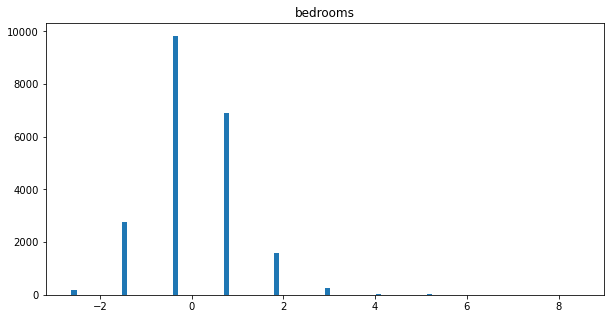

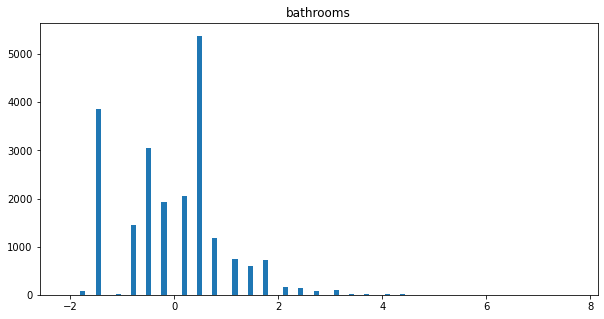

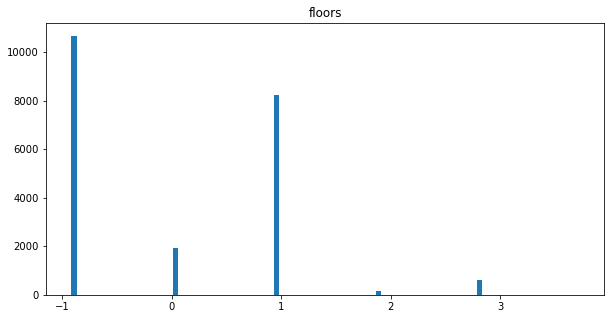

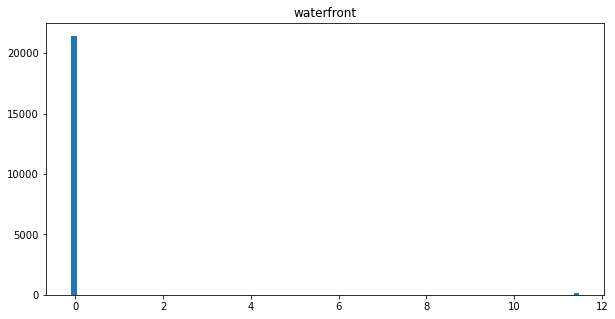

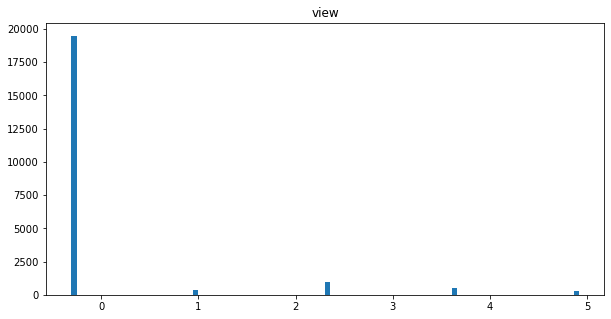

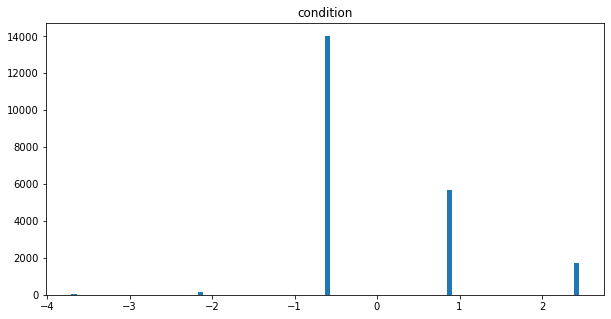

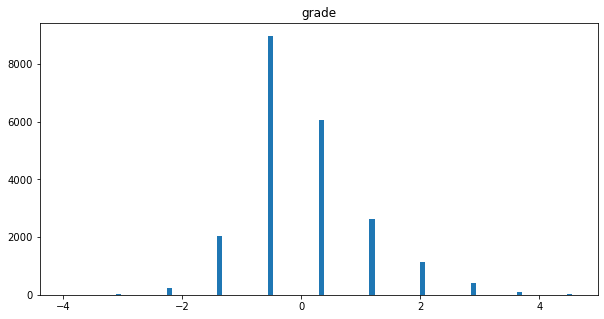

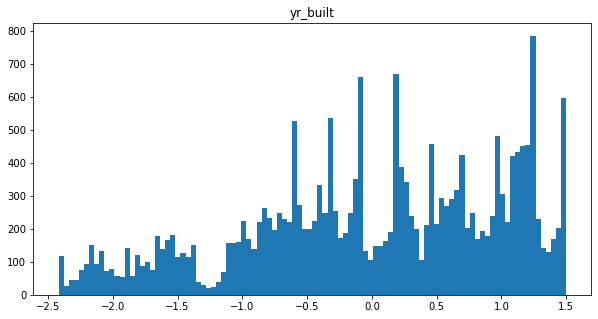

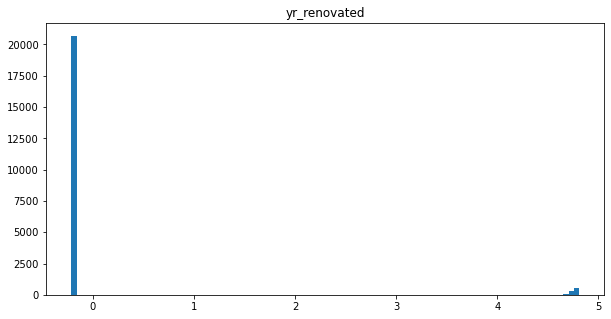

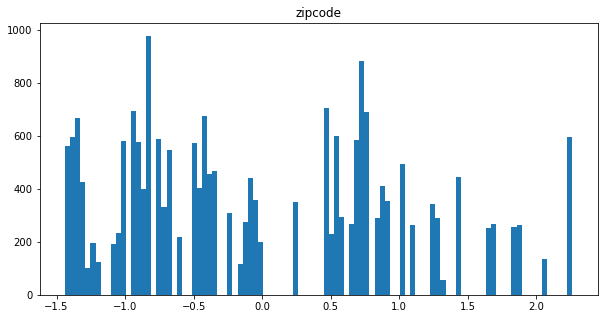

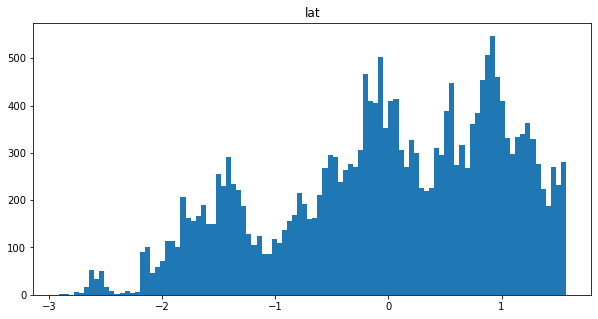

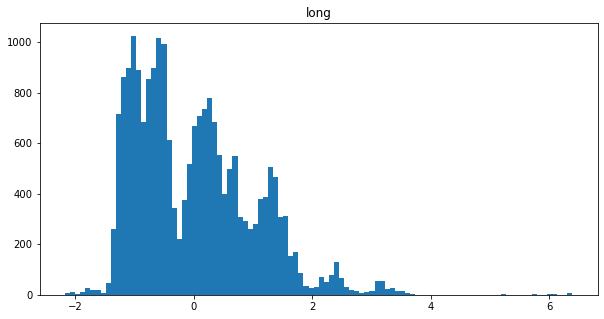

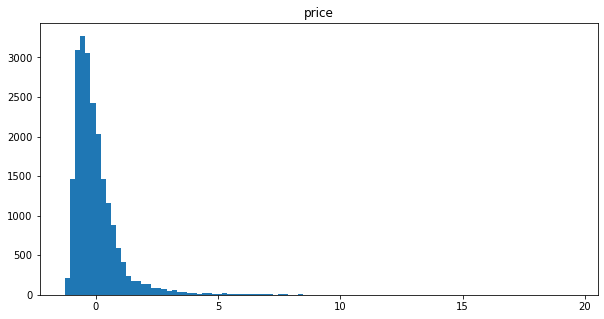

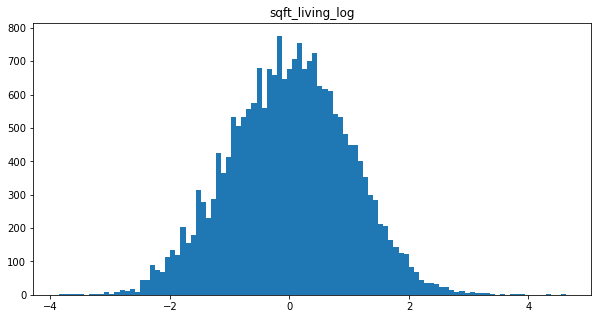

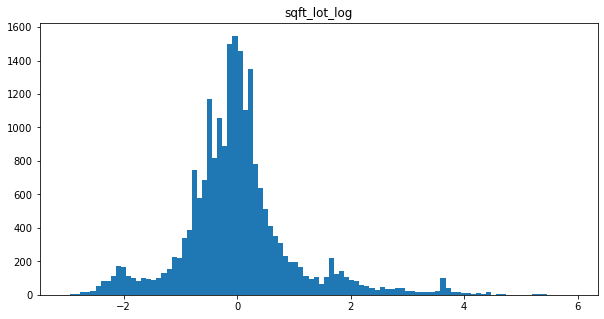

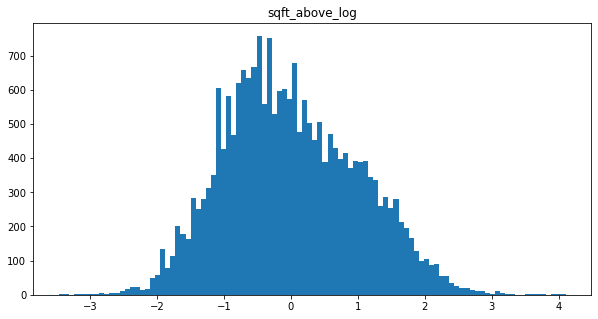

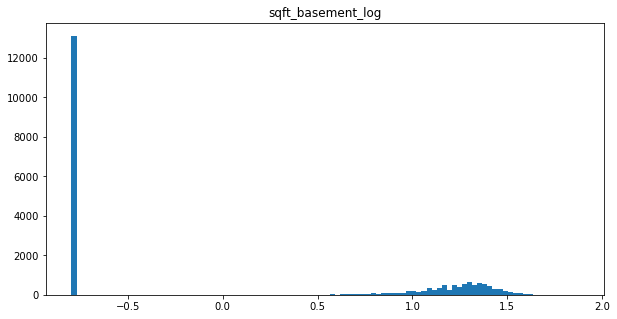

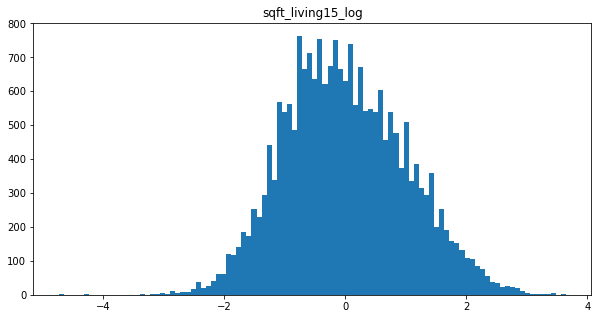

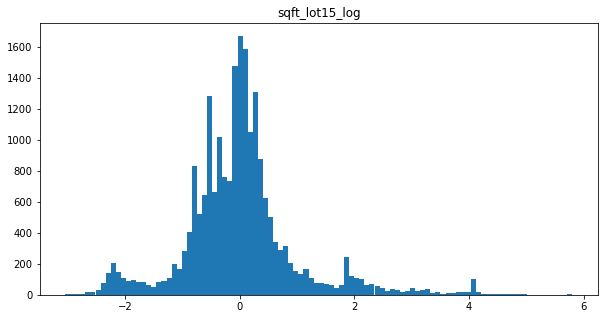

In [16]:
for i in df.columns:   
    plt.figure(figsize=(10,5))
    plt.hist(df[i], bins = 100)
    plt.title(i)
    plt.show();

In [17]:
# first, split X-y (learning-target data)
X=df.drop(columns=['price'])
y=df['price']

# checking shape
print(X.shape)
print(y.shape)

# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
#random state fixed sample



(21596, 18)
(21596,)


In [18]:
# Crear los modelos



from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction



from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2



# Lasso L1



lasso=Lasso()
lasso.fit(X_train, y_train)



y_pred_lasso = lasso.predict(X_test)



# Ridge L2



ridge=Ridge()
ridge.fit(X_train, y_train)



y_pred_ridge = ridge.predict(X_test)



# ElasticNet L1+L2



elastic=ElasticNet()
elastic.fit(X_train, y_train)



y_pred_elastic = elastic.predict(X_test)



from sklearn.ensemble import RandomForestRegressor as RFR



rfr=RFR()
rfr.fit(X_train, y_train)



y_pred_rfr = rfr.predict(X_test)



from xgboost import XGBRegressor as XGBR



xgbr=XGBR()
xgbr.fit(X_train, y_train)



y_pred_xgbr = xgbr.predict(X_test)



from lightgbm import LGBMRegressor as LGBMR



lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)



y_pred_lgbmr = lgbmr.predict(X_test)



models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]



for i in range(len(models)):



    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)



    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

C:\Users\FE161VK\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\FE161VK\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model: linreg, train R2: 0.6670025682084696 -- test R2: 0.6570096668201921
Model: lasso, train R2: 0.0 -- test R2: -0.00015839521795535383
Model: ridge, train R2: 0.6670025451297104 -- test R2: 0.6570095573149858
Model: elastic, train R2: 0.15135718888203942 -- test R2: 0.15428510574863552
Model: rfr, train R2: 0.9813702427034386 -- test R2: 0.8803118597573845
Model: xgbr, train R2: 0.9774634338931004 -- test R2: 0.8815235761257251
Model: lgbmr, train R2: 0.9427277161545666 -- test R2: 0.8869255362880154


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



mae = []
mse = []
rmse = []
mape = []
r2 = []



for i in preds:
    mae.append(np.round(mean_absolute_error(y_test, i), 2))
    mse.append(np.round(mean_squared_error(y_test,i),2))
    rmse.append(np.round(np.sqrt(mse[-1]),2))
    mape.append(np.round(np.mean((y_test - i)/y)*100,2))
    r2.append(np.round(r2_score(y_test, i), 2))

In [24]:
mae, mse, rmse, mape, r2

([0.36, 0.63, 0.36, 0.57, 0.18, 0.18, 0.18],
 [0.33, 0.97, 0.33, 0.82, 0.12, 0.12, 0.11],
 [0.57, 0.98, 0.57, 0.91, 0.35, 0.35, 0.33],
 [123.11, 101.25, 123.15, 117.52, 38.47, -0.6, 36.8],
 [0.66, -0.0, 0.66, 0.15, 0.88, 0.88, 0.89])